2.) Original o traducción
==
Miquel Gotanegra

<strong>
A veces nos interesa saber si un texto corresponde a la fuente original o ha sido derivado de ella de alguna manera. En este problema intentaremos averiguar si un texto proviene de la lengua original (Inglés) o es una traducción. Vamos a usar fragmentos extraídos al azar de obras de autores de diferentes épocas y géneros con el objeto de comprobar si realmente se puede realizar esa clasificación. Estos están escritos en inglés, pero algunos de ellos han sido traducidos de otros idiomas, como el ruso, el francés o el italiano entre otros.

Trabajaremos con un conjunto de datos compuesto por fragmentos de obras de 20 autores seleccionados2 que podéis obtener mediante la función load_translation de la librería apafib.
Esta función retornará una lista con los textos y otra con las etiquetas que les corresponden. Resuelve los siguientes apartados ilustrando los resultados de la manera que te parezca más
adecuada.
</strong>



In [703]:
# Uncomment to upgrade packages
# !pip install pandas --user --upgrade --quiet
# !pip install numpy --user --upgrade --quiet
# !pip install scipy --user --upgrade --quiet
# !pip install seaborn --user --upgrade --quiet
# !pip install matplotlib --user --upgrade --quiet
# !pip install scikit-learn --user --upgrade 
# !pip install scikit-optimize --user --quiet
# !pip install eli5 --user --quiet
# !pip install apafib --upgrade --user --quiet
# !pip install wordcloud --upgrade --user --quiet

In [704]:
from apafib import load_translation
import pandas as pd
from pandas import read_csv

import numpy as np
from numpy.random import choice
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn import set_config

from sklearn.metrics import  ConfusionMatrixDisplay,\
                    classification_report,  RocCurveDisplay, PrecisionRecallDisplay,\
                    accuracy_score, f1_score, precision_score, recall_score

from sklearn.manifold import TSNE
from sklearn.naive_bayes import BernoulliNB, GaussianNB, CategoricalNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error
from yellowbrick.classifier.rocauc import roc_auc

from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV,train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import warnings

set_config(display='text')
warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 16})
# sns.set()
pd.set_option('display.precision', 3)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display, HTML
show_html = lambda html: display(HTML(html))

from collections import Counter

<strong>
a) El trabajar con texto es algo diferente de los datos tabulares habituales. En este tipo de datos
se obtiene la matriz de datos a partir de extraer un subconjunto de las palabras de los textos
y hacer un cálculo sobre ellas como por ejemplo determinar si están o no en un ejemplo o
el número de veces que aparece. Esto lo podemos hacer con la función CountVectorizer
del scikit-learn que es precisamente para este tipo de datos. Generaremos matrices de datos
variando el tamaño del vocabulario, usaremos 2500 y 5000 palabras, ya que nos imaginamos que decidir en este problema estará en los detalles. Podemos generar la matriz de datos
para que contenga solo si las palabras aparecen o no en cada ejemplo o el número de veces
que aparecen, utilizaremos las dos opciones. Emplea el parámetro stop_words que tiene
esta función indicando que el idioma del texto es el inglés. Esto nos dará cuatro conjuntos de datos diferentes. Genera una partición de entrenamiento y una de test (80 %/20 %)
que sea estratificada (fija también el estado del generador de números aleatorios para la
reproducibilidad).


In [705]:
text, labels = load_translation()
# labels are either 'Original' or 'Translated'
Counter(labels)

Counter({'Original': 300, 'Translated': 300})

Vemos que el conjunto de datos está bien balanceado.

In [706]:
CV2500_bin = CountVectorizer(stop_words='english', max_features=2500, binary=True)
CV2500_nonBin = CountVectorizer(stop_words='english', max_features=2500, binary=False)
CV5000_bin = CountVectorizer(stop_words='english', max_features=5000, binary=True)
CV5000_nonBin = CountVectorizer(stop_words='english', max_features=5000, binary=False)

In [707]:
DataMat2500B = CV2500_bin.fit_transform(text)
DataMat2500NB = CV2500_nonBin.fit_transform(text)
DataMat5000B = CV5000_bin.fit_transform(text)
DataMat5000NB = CV5000_nonBin.fit_transform(text)

In [708]:
lenc = LabelEncoder()
codeLabels = lenc.fit_transform(labels)

In [709]:
X2500B_train, X2500B_test, y2500B_train, y2500B_test = train_test_split(DataMat2500B, codeLabels, test_size=0.2, random_state=50, stratify=labels)
X2500NB_train, X2500NB_test, y2500NB_train, y2500NB_test = train_test_split(DataMat2500NB, codeLabels, test_size=0.2, random_state=50, stratify=labels)
X5000B_train, X5000B_test, y5000B_train, y5000B_test = train_test_split(DataMat5000B, codeLabels, test_size=0.2, random_state=50, stratify=labels)
X5000NB_train, X5000NB_test, y5000NB_train, y5000NB_test = train_test_split(DataMat5000NB, codeLabels, test_size=0.2, random_state=50, stratify=labels)


<strong>
b) Los datos claramente no cumplen los supuestos de PCA, así que podemos intentar visualizarlos mediante t-SNE. ¿Se puede ver alguna separabilidad entre los datos en la proyección
en 2D? Comenta los resultados.


In [710]:
##Readability
X_train, X_test, y_train, y_test = X2500B_train, X2500B_test, y2500B_train, y2500B_test

tsne = TSNE(init='pca',random_state=50)

### Binary 2500

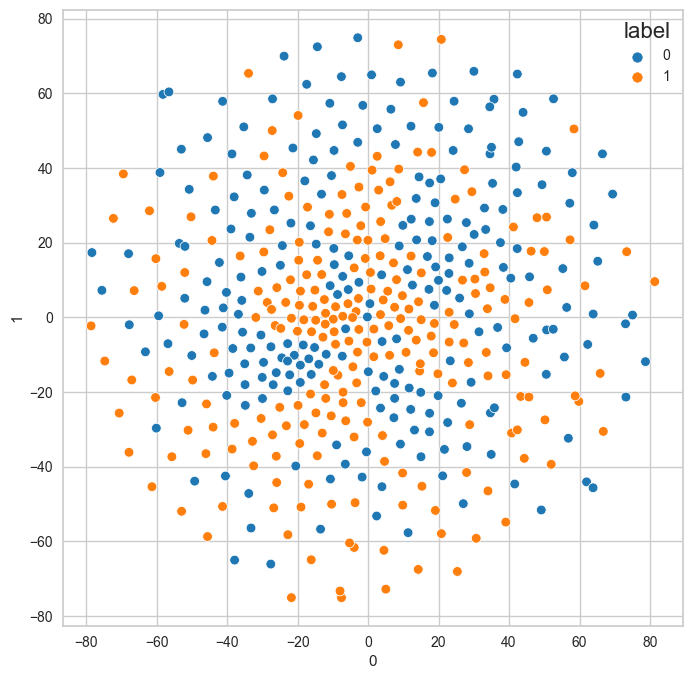

In [711]:
##2500 Binary
tdata = tsne.fit_transform(X_train.todense())
dfdata = pd.concat([pd.DataFrame(tdata),pd.DataFrame({'label':y_train})],axis=1);
fig = plt.figure(figsize=(8,8));
sns.scatterplot(x=0, y=1, hue='label', data=dfdata, palette='tab10');
##label 0 is Original, label 1 is Translated

### NonBinary 2500

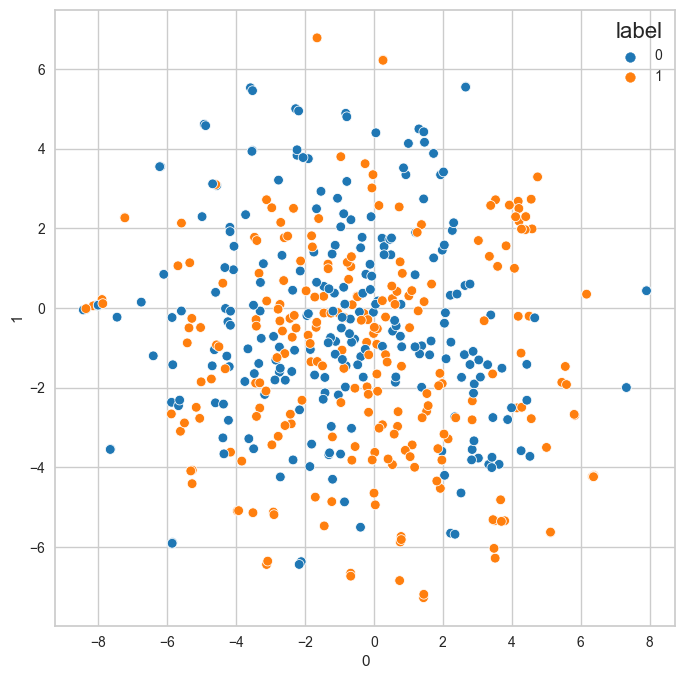

In [712]:
X_train, X_test, y_train, y_test = X2500NB_train, X2500NB_test, y2500NB_train, y2500NB_test

tdata = tsne.fit_transform(X_train.todense())
dfdata = pd.concat([pd.DataFrame(tdata),pd.DataFrame({'label':y_train})],axis=1);
fig = plt.figure(figsize=(8,8));
sns.scatterplot(x=0, y=1, hue='label', data=dfdata, palette='tab10');
##label 0 is Original, label 1 is Translated

### Binary 5000

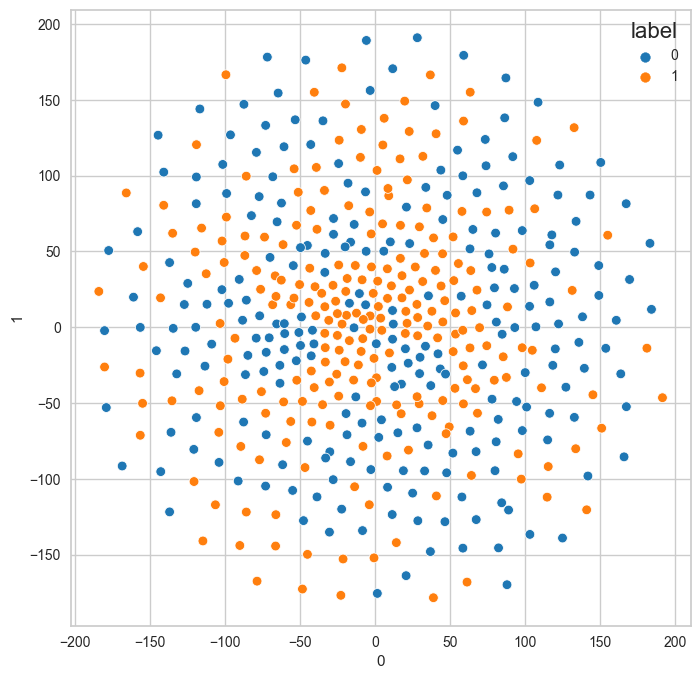

In [713]:
X_train, X_test, y_train, y_test = X5000B_train, X5000B_test, y5000B_train, y5000B_test

tdata = tsne.fit_transform(X_train.todense())
dfdata = pd.concat([pd.DataFrame(tdata),pd.DataFrame({'label':y_train})],axis=1);
fig = plt.figure(figsize=(8,8));
sns.scatterplot(x=0, y=1, hue='label', data=dfdata, palette='tab10');
##label 0 is Original, label 1 is Translated

### NonBinary 5000

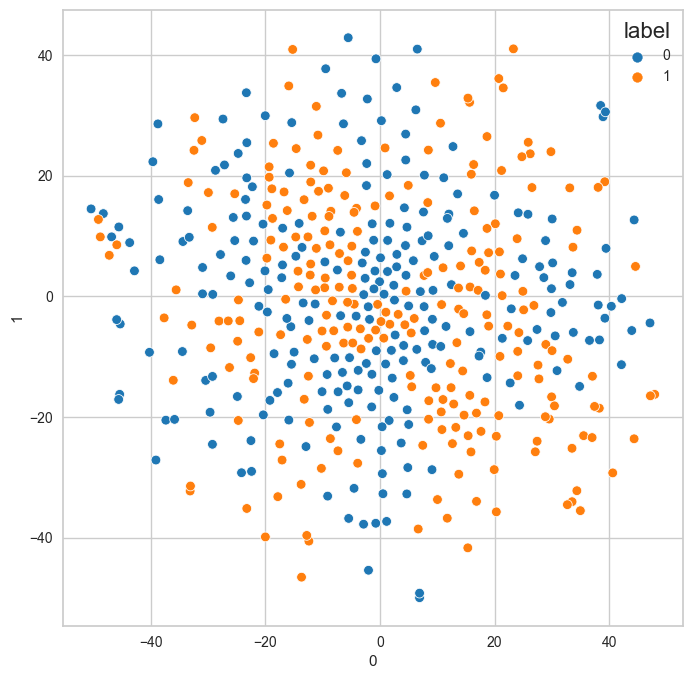

In [714]:
X_train, X_test, y_train, y_test = X5000NB_train, X5000NB_test, y5000NB_train, y5000NB_test

tdata = tsne.fit_transform(X_train.todense())
dfdata = pd.concat([pd.DataFrame(tdata),pd.DataFrame({'label':y_train})],axis=1);
fig = plt.figure(figsize=(8,8));
sns.scatterplot(x=0, y=1, hue='label', data=dfdata, palette='tab10');
##label 0 is Original, label 1 is Translated

En los cuatro conjuntos de datos se puede apreciar algunos grupos de la misma categoría, no parece haber una frontera clara entre las dos categorías, así que parece que las categorías no son separables, al menos en la proyección 2D de t-SNE.

Podemos apreciar que en los conjuntos de datos binarios, los datos parecen tener una distancia mucho más uniforme entre ellos, debido a que disponemos de información más limitada de cada texto.

También podemos ver que en los conjuntos de mayor vocabulario los datos están mejor repartidos por el plano (en el de 2500 se forman más aglomeraciones de datos de la misma categoría), ya que cada dato cuenta con más atributos con los que diferenciarse del resto.

<strong>
c) Tenemos datos que o son binarios (Bernoulli) o corresponden a distribuciones multinomiales respectivamente. Si asumimos que las palabras de un texto son independientes (no
lo son realmente) podemos usar Naïve Bayes para clasificarlos. Tienes en scikit-learn modelos de Naïve Bayes que emplean estas dos distribuciones. Aplica estos métodos a los
conjuntos de datos que has generado y determina la calidad de los modelos. Comenta los
resultados.


### Binarios con BernoulliNB

#### 2500

In [715]:
print(np.mean(cross_val_score(BernoulliNB(),X2500B_train,y2500B_train,cv=10)))

0.8229166666666667


Parece que el modelo BernoulliNB da resultados suficientemente buenos, vamos a probarlo con el conjunto de entrenamiento.

In [716]:
bnb_model = BernoulliNB().fit(X2500B_train,y2500B_train)
names = ['Original','Translated'];
print(classification_report(bnb_model.predict(X2500B_test), y2500B_test,target_names=names))

              precision    recall  f1-score   support

    Original       0.83      0.85      0.84        59
  Translated       0.85      0.84      0.84        61

    accuracy                           0.84       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.84      0.84      0.84       120



Vemos que la precisión es suficientemente buena con un 84% de acierto medio. Ambas classes tienen 84% de acierto.

#### 5000

In [717]:
print(np.mean(cross_val_score(BernoulliNB(),X5000B_train,y5000B_train,cv=10)))

0.84375


De nuevo, la validación cruzada indica que este modelo da buenos resultados.

In [718]:
bnb_model = BernoulliNB().fit(X5000B_train,y5000B_train)
names = ['Original','Translated'];
print(classification_report(bnb_model.predict(X5000B_test), y5000B_test,target_names=names))

              precision    recall  f1-score   support

    Original       0.82      0.86      0.84        57
  Translated       0.87      0.83      0.85        63

    accuracy                           0.84       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.84      0.84      0.84       120



Podemos ver unos resultados consistentes con la validación cruzada, y prácticamente iguales a los obtenidos con el conjunto de datos de vocabulario reducido, esta vez con una diferencia de +1% al porcentaje de aciertos de los traducidos.

Parece que ampliar el vocabulario que almacenamos tiene un efecto ínfimo en la calidad del modelo binario, por tanto sería menos costoso usar el de vocabulario reducido para obtener el mismo resultado.

### No bianrios con MultinomialNB
#### 2500

In [719]:
print(np.mean(cross_val_score(MultinomialNB(),X2500NB_train,y2500NB_train,cv=10)))

0.86875


Vemos que este modelo es adecuado para los datos no binarios.

In [720]:
bnb_model = MultinomialNB().fit(X2500NB_train,y2500NB_train)
names = ['Original','Translated'];
print(classification_report(bnb_model.predict(X2500NB_test), y2500NB_test,target_names=names))

              precision    recall  f1-score   support

    Original       0.90      0.87      0.89        62
  Translated       0.87      0.90      0.88        58

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.88       120
weighted avg       0.88      0.88      0.88       120



Podemos ver que en nuestro modelo concreto obtenemos un 88% de acierto de media, bastante mejor (+4%) que el modelo del conjunto de datos binarios del mismo tamaño de vocabulario.

#### 5000

In [721]:
print(np.mean(cross_val_score(MultinomialNB(),X5000NB_train,y5000NB_train,cv=10)))

0.8729166666666666


La validación curzada nos da el mejor resultado hasta ahora, vamos a ver que tal se comporta el modelo.

In [722]:
bnb_model = MultinomialNB().fit(X5000NB_train,y5000NB_train)
names = ['Original','Translated'];
print(classification_report(bnb_model.predict(X5000NB_test), y5000NB_test,target_names=names))

              precision    recall  f1-score   support

    Original       0.95      0.92      0.93        62
  Translated       0.92      0.95      0.93        58

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



Finalmente obtenemos el mejor modelo de todos, con un 93% de acierto de media, parece que hemos tenido suerte con al conjunto de test, ya que la validación cruzada nos da un 5% menos.

En el caso del MultinominalNB si que merece la pena escoger el conjunto de datos de mayor vocabulario

##### Podemos observar una diferencia bastante notable entre el acierto de los modelos a favor del modelo multinominal. Esto se debe a que los datos no binarios nos dan mucha más información del texto, ya que no es lo mismo que una palabra aparezca una vez que cincuenta. También en el no binario observamos que el conjunto con mayor vocabulario da mejores resultados, también debido a que tenemos más información de cada texto, lo que nos permite diferenciarlos mejor.

<strong>
d) Los modelos lineales funcionan bien si existe una buena separación entre las clases, pero la
frontera puede ser suficientemente compleja para que no podamos superar cierto límite. El
modelo de k vecinos cercanos si puede aproximar fronteras complejas y parece adecuado
para este problema. Ajusta un modelo de Knn a los conjuntos de datos que has generado
explorando sus hiperparámetros, y determina la calidad de los mejores modelos. Piensa
también si es adecuado el normalizar de alguna manera los datos. Comenta los resultados.
Vistos los resultados obtenidos por los clasificadores y teniendo en cuenta lo que hace
falta para realizar inferencia con cada uno de ellos, ¿qué modelo de entre todos los que has obtenido elegirías? Razona la respuesta.

### Binarios

Los binarios no hace falta escalarlos, ya que todos los valores son o 0 o 1

In [723]:
param = {'n_neighbors':[1, 3, 5, 7, 10,13, 15],  ## 'n_neighbors':list(range(1,120)), ## todos los vecinos, pero no hace falta
          'weights':['distance', 'uniform'], 
          'leaf_size':[1, 5, 10, 20, 30,50],
          'metric': ['l2', 'l1', 'cosine']}
knn =  KNeighborsClassifier()

#### 2500

In [724]:
print(np.mean(cross_val_score(knn,X2500B_train,y2500B_train,cv=10)))

0.5729166666666667


Un resultado bastante horrible, vamos a probar de ajustar los hiperparámetros

In [725]:
knn_gs =  GridSearchCV(knn,param,cv=5, n_jobs=-1);
knn_gs.fit(X2500B_train,y2500B_train);

In [726]:
show_html(pd.DataFrame(knn_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by=['rank_test_score']).head(5).to_html())

,params,mean_test_score,rank_test_score
78,"{'leaf_size': 5, 'metric': 'cosine', 'n_neighbors': 10, 'weights': 'distance'}",0.892,1
36,"{'leaf_size': 1, 'metric': 'cosine', 'n_neighbors': 10, 'weights': 'distance'}",0.892,1
246,"{'leaf_size': 50, 'metric': 'cosine', 'n_neighbors': 10, 'weights': 'distance'}",0.892,1
120,"{'leaf_size': 10, 'metric': 'cosine', 'n_neighbors': 10, 'weights': 'distance'}",0.892,1
162,"{'leaf_size': 20, 'metric': 'cosine', 'n_neighbors': 10, 'weights': 'distance'}",0.892,1


In [727]:
knn_ajustado = KNeighborsClassifier(leaf_size= 5, metric= 'cosine', n_neighbors= 10, weights= 'distance');
print(np.mean(cross_val_score(knn_ajustado,X2500B_train,y2500B_train,cv=10)))

0.8958333333333333


Una vez ajustados los parametros a los óptimos, obtenemos una score mucho mayor de la validación cruzada. Vamos a probar el modelo con los datos de entrenamiento

In [728]:
knn_ajustado.fit(X2500B_train,y2500B_train);
print(classification_report(knn_ajustado.predict(X2500B_test), y2500B_test,target_names=names))

KNeighborsClassifier(leaf_size=5, metric='cosine', n_neighbors=10,
                     weights='distance')

              precision    recall  f1-score   support

    Original       0.87      0.90      0.88        58
  Translated       0.90      0.87      0.89        62

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.88       120
weighted avg       0.88      0.88      0.88       120



Vemos un resultado coherente con la validación cruzada, con una tasa de acierto bastante buena

#### 5000

In [729]:
print(np.mean(cross_val_score(knn,X5000B_train,y5000B_train,cv=10)))

0.5291666666666666


De nuevo, sin ajustar obtenemos un resultado péssimo

In [730]:
knn_gs =  GridSearchCV(knn,param,cv=5, n_jobs=-1);
knn_gs.fit(X5000B_train,y5000B_train);
show_html(pd.DataFrame(knn_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by=['rank_test_score']).head().to_html())

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 5, 10, 20, 30, 50],
                         'metric': ['l2', 'l1', 'cosine'],
                         'n_neighbors': [1, 3, 5, 7, 10, 13, 15],
                         'weights': ['distance', 'uniform']})

,params,mean_test_score,rank_test_score
120,"{'leaf_size': 10, 'metric': 'cosine', 'n_neighbors': 10, 'weights': 'distance'}",0.908,1
36,"{'leaf_size': 1, 'metric': 'cosine', 'n_neighbors': 10, 'weights': 'distance'}",0.908,1
246,"{'leaf_size': 50, 'metric': 'cosine', 'n_neighbors': 10, 'weights': 'distance'}",0.908,1
204,"{'leaf_size': 30, 'metric': 'cosine', 'n_neighbors': 10, 'weights': 'distance'}",0.908,1
78,"{'leaf_size': 5, 'metric': 'cosine', 'n_neighbors': 10, 'weights': 'distance'}",0.908,1


encontramos los mismos hiperparámetros de antes

In [731]:
knn_ajustado = KNeighborsClassifier(leaf_size= 10, metric= 'cosine', n_neighbors= 10, weights= 'distance');
print('cross val: ' + str(np.mean(cross_val_score(knn_ajustado,X5000B_train,y5000B_train,cv=10))))
knn_ajustado.fit(X5000B_train,y5000B_train);
print(classification_report(knn_ajustado.predict(X5000B_test), y5000B_test,target_names=names));


cross val: 0.9145833333333334
              precision    recall  f1-score   support

    Original       0.88      0.91      0.90        58
  Translated       0.92      0.89      0.90        62

    accuracy                           0.90       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.90      0.90      0.90       120



Vemos una score coherente con la validación cruzada. También observamos que aumentar el vocabulario nos ayuda a mejorar la precisión.

### No Binarios

Los datos no binarios los normalizamos para poder usar el knn

In [732]:
scaler = MinMaxScaler()

X2500NB_train_s = scaler.fit_transform(X2500NB_train.todense())
X2500NB_test_s = scaler.transform(X2500NB_test.todense())


X5000NB_train_s = scaler.fit_transform(X5000NB_train.todense())
X5000NB_test_s = scaler.transform(X5000NB_test.todense())

#### 2500

In [733]:
print('cross val: ' + str(np.mean(cross_val_score(knn,X2500NB_train_s,y2500NB_train,cv=10))));
knn_gs =  GridSearchCV(knn,param,cv=5, n_jobs=-1);
knn_gs.fit(X2500NB_train_s,y2500NB_train);
show_html(pd.DataFrame(knn_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by=['rank_test_score']).head(1).to_html())

cross val: 0.59375


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 5, 10, 20, 30, 50],
                         'metric': ['l2', 'l1', 'cosine'],
                         'n_neighbors': [1, 3, 5, 7, 10, 13, 15],
                         'weights': ['distance', 'uniform']})

,params,mean_test_score,rank_test_score
162,"{'leaf_size': 20, 'metric': 'cosine', 'n_neighbors': 10, 'weights': 'distance'}",0.898,1


In [734]:
knn_ajustado = KNeighborsClassifier(leaf_size= 10, metric= 'cosine', n_neighbors= 10, weights= 'distance');
print('cross val: '+str(np.mean(cross_val_score(knn_ajustado,X2500NB_train,y2500NB_train,cv=10))))

print(classification_report(knn_gs.predict(X2500NB_test), y2500NB_test,target_names=names));


cross val: 0.8625
              precision    recall  f1-score   support

    Original       0.93      0.89      0.91        63
  Translated       0.88      0.93      0.91        57

    accuracy                           0.91       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.91      0.91      0.91       120



Contra los datos de entrenamiento este modelo obtiene un 91%, aunque la validación cruzada suguiere que ha sido un golpe de suerte. Aun así, obetenemos una tasa muy similar a la del conjunto binario.

#### 5000

In [735]:
print('cross val: ' + str(np.mean(cross_val_score(knn,X5000NB_train_s,y5000NB_train,cv=10))));
knn_gs =  GridSearchCV(knn,param,cv=5, n_jobs=-1);
knn_gs.fit(X5000NB_train_s,y5000NB_train);
show_html(pd.DataFrame(knn_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by=['rank_test_score']).head(1).to_html())

cross val: 0.5104166666666666


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 5, 10, 20, 30, 50],
                         'metric': ['l2', 'l1', 'cosine'],
                         'n_neighbors': [1, 3, 5, 7, 10, 13, 15],
                         'weights': ['distance', 'uniform']})

,params,mean_test_score,rank_test_score
204,"{'leaf_size': 30, 'metric': 'cosine', 'n_neighbors': 10, 'weights': 'distance'}",0.898,1


In [736]:
knn_ajustado = KNeighborsClassifier(leaf_size= 10, metric= 'cosine', n_neighbors= 10, weights= 'distance');
print('cross val: '+str(np.mean(cross_val_score(knn_ajustado,X5000NB_train,y5000NB_train,cv=10))))

print(classification_report(knn_gs.predict(X5000NB_test), y5000NB_test,target_names=names));


cross val: 0.86875
              precision    recall  f1-score   support

    Original       0.93      0.86      0.90        65
  Translated       0.85      0.93      0.89        55

    accuracy                           0.89       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.90      0.89      0.89       120



De nuevo vemos un resultado muy similar al anterior, no parece que incrementar el vocabulario aumente el porcentaje de acierto.
Curiosamente este resultado es inferior al obtenido con los datos binarios.

## Conclusión



###

Si bien <strong>MultinominalNB(NoBinario,5000)</strong> nos da un resultado bastante bueno (88%), yo personalmente usaría el clasificador del modelo <strong>Knn(Binario,5000)</strong>, que es el que obtiene el mayor puntaje, tanto en validación cruzada como en la predicción sobre el test.

Aun sabiendo que el knn es bastante más costoso, ya que primero hay que calcular los hiperparámetros, creo que vale la pena para conseguir un clasificador con 90% de acierto. Si el rendimiento fuera crítico para la aplicación usaría el MultinominalNB.